# Empirical Method in Financial Econometrics: Project 9

## Name: Xijie Zhou

## Exercise 1

### A

In [203]:
import os
import numpy as np
os.chdir("/Users/zhouxijie/python/project_9/datas")

In [204]:
def load_data(filename,columns=0):
    data = np.loadtxt(filename,delimiter = ',',usecols = columns)
    return data

In [205]:
option_data = load_data("20150102_48.csv",(0,2,3,4,5,6,7))
print(option_data[0])

[2.0150102e+07 2.0541000e+02 2.0000000e-02 2.2098000e+00 3.6500000e-01
 1.7000000e+02 4.9000000e+01]


In [206]:
dates,spy,rf,q,put,strike,tenor = (
    data[:,0],
    data[:,1],
    data[:,2]/100,
    data[:,3]/100,
    data[:,4],
    data[:,5],
    data[:,6]/365)

The option file I used is 20150102_48.csv.

### B

In [207]:
def get_return(fileaddress):
    date, time, price = np.loadtxt(fileaddress, delimiter = ',', unpack = True)
    N = sum(date == date[0]) 
    T = len(date)//N 
    returns = np.diff((np.reshape(np.log(price), (N,T), order = 'F')), axis = 0)
    return returns, date

In [208]:
r, date = get_return('/Users/zhouxijie/python/project_9/datas/SPY.csv')

In [209]:
day = np.where(date == 20150102)[0][0]//78

In [210]:
def realized_var(returns):
    RV = sum(returns**2) 
    return RV

In [211]:
RV = np.sqrt(realized_var(r[:,2014])*252)*100

In [212]:
print(RV)

12.494961571074171


The realized variance of the option file of 20150102_48 is 12.49%.

### C

In [213]:
ratio = strike/spy

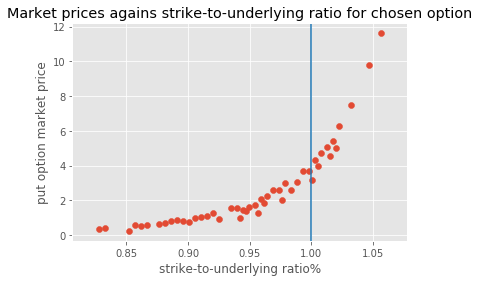

In [214]:
import matplotlib.pyplot as plt
with plt.style.context("ggplot"):
    plt.scatter(ratio, put)
    plt.axvline(x=1)
    plt.title('Market prices agains strike-to-underlying ratio for chosen option')
    plt.xlabel('strike-to-underlying ratio%')
    plt.ylabel('put option market price')

Interpret: It is clear to see that when the market price of an option increases, the option's strike-to-underlying ratio also increases, for the reason that higher strike means a larger profit at maturity. When the ratio is 1, the market price is about 4 dollar. when the ratio is less than 1, the slope of the curve is relatively small, means market price is less sensitive to the change of the ratio. On the contrary, when the ratio is greater than 1, the slope of the curve is relatively large, means market price is high sensitive to the change of the ratio.

### D

In [215]:
from scipy.stats import norm

In [216]:
def put_price(s,k,T,r,q,sigma):
    d1 = (np.log(s/k)+(r-q+ sigma ** 2/2)*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    put_price = k * np.exp(-r*T) * norm.cdf(-d2) - s*np.exp(-q*T)*norm.cdf(-d1)
    return put_price

### E

In [217]:
p = put_price(spy,strike,tenor,rf,q,RV/100)

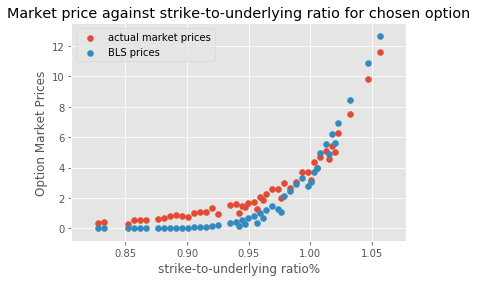

In [218]:
import matplotlib.legend
with plt.style.context("ggplot"):
    line1 = plt.scatter(ratio,put)
    line2 = plt.scatter(ratio,p)
    plt.legend(['actual market prices','BLS prices'])
    plt.xlabel("strike-to-underlying ratio%")
    plt.ylabel("Option Market Prices")
    plt.title("Market price against strike-to-underlying ratio for chosen option")

Interpret: It is obvious to see that when the actual market prices increase, the BLS prices alos increase. Specifically, before the point of the ratio is about 1.02 and the price is 5, market prices are higher than the BLS prices. On the contrary, market prices are lower than the BLS prices, which means only the ratio should be around 1, the BLS prices could be closer to the actual market prices.

### F

My plot is consistent with this finding. As what I mentioned in the question E in detail, when the strike-to-underlying ratio is around 0.98-1.02, the BLS prices would be close to the actual market prices.

### G

The option files I used are 20150106_72.csv, 20150108_41.csv, 20150109_53.csv, 20150112_55.csv, 20150113_64.csv, 20150115_66.csv, 20150122_66.csv, 20150126_46.csv, 20150127_20.csv.

In [271]:
def bls_data(filename):
    dates,spy,rf,q,put,strike,tenor = np.loadtxt(filename, delimiter = ',',usecols = (0,2,3,4,5,6,7), unpack = True)
    ratio = strike/spy
    p = put_price(spy,strike,tenor/365,rf/100,q/100,RV/100)

    return ratio,p,put

In [272]:
ratio_1,p_1,put_1 = bls_data('20150106_72.csv')
ratio_2,p_2,put_2 = bls_data('20150108_41.csv')
ratio_3,p_3,put_3 = bls_data('20150109_53.csv')
ratio_4,p_4,put_4 = bls_data('20150112_55.csv')
ratio_5,p_5,put_5 = bls_data('20150113_64.csv')
ratio_6,p_6,put_6 = bls_data('20150115_66.csv')
ratio_7,p_7,put_7 = bls_data('20150122_66.csv')
ratio_8,p_8,put_8 = bls_data('20150126_46.csv')
ratio_9,p_9,put_9 = bls_data('20150127_20.csv')

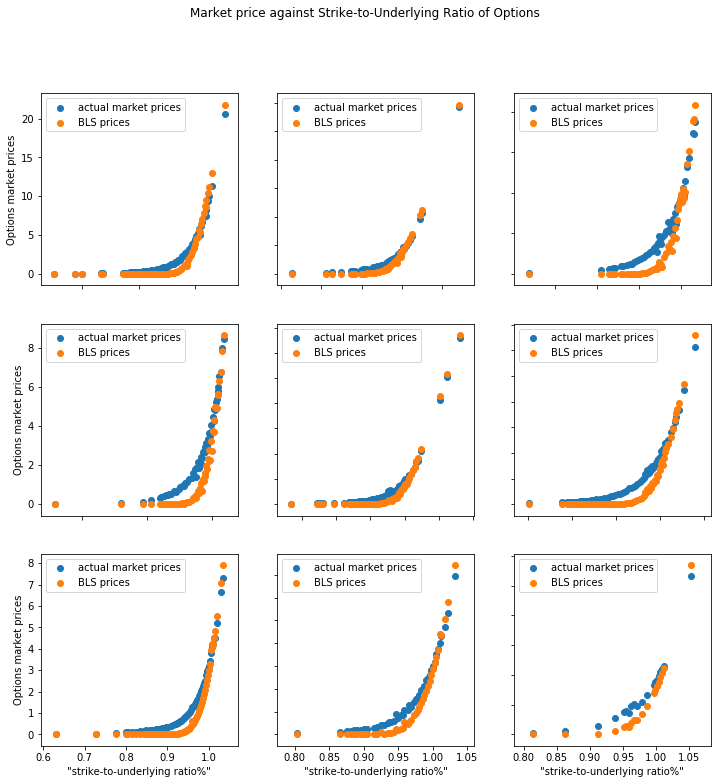

In [273]:
fig,axes = plt.subplots(nrows = 3, ncols = 3, figsize=(12,12))
fig.suptitle("Market price against Strike-to-Underlying Ratio of Options")

axes[0,0].scatter(ratio_1,put_1)
axes[0,0].scatter(ratio_1,p_1)
axes[0,0].legend(['actual market prices','BLS prices'])

axes[0,1].scatter(ratio_2,put_2)
axes[0,1].scatter(ratio_2,p_2)
axes[0,1].legend(['actual market prices','BLS prices'])

axes[0,2].scatter(ratio_3,put_3)
axes[0,2].scatter(ratio_3,p_3)
axes[0,2].legend(['actual market prices','BLS prices'])

axes[1,0].scatter(ratio_4,put_4)
axes[1,0].scatter(ratio_4,p_4)
axes[1,0].legend(['actual market prices','BLS prices'])

axes[1,1].scatter(ratio_5,put_5)
axes[1,1].scatter(ratio_5,p_5)
axes[1,1].legend(['actual market prices','BLS prices'])

axes[1,2].scatter(ratio_6,put_6)
axes[1,2].scatter(ratio_6,p_6)
axes[1,2].legend(['actual market prices','BLS prices'])

axes[2,0].scatter(ratio_7,put_7)
axes[2,0].scatter(ratio_7,p_7)
axes[2,0].legend(['actual market prices','BLS prices'])

axes[2,1].scatter(ratio_8,put_8)
axes[2,1].scatter(ratio_8,p_8)
axes[2,1].legend(['actual market prices','BLS prices'])

axes[2,2].scatter(ratio_9,put_9)
axes[2,2].scatter(ratio_9,p_9)
axes[2,2].legend(['actual market prices','BLS prices'])

for ax in axes.flat:
    ax.set(xlabel='"strike-to-underlying ratio%"', ylabel='Options market prices')
    ax.label_outer()

### H

I wouldn't feel comfortable to do that. When the transactions are sufficient, the market will quickly clear out to reach equilibrium. Therefore, the volatility cannot be constant, that is, the fixed volatility index used in the BLS model is not true in reality. The defect of the BLS model itself leads to the unreasonability of the pricing of options, so the pricing generated by the model cannot be used to judge trading behavior.